In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [4]:
# Load Dataset
url = './kidney_disease.csv'
df = pd.read_csv(url)

# Preview
print("Initial data snapshot:")
print(df.head())


Initial data snapshot:
   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [5]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [7]:
# Replace missing values ('?') with NaN
df = df.replace('?', np.nan)

# Convert all columns to appropriate types
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')


C:\Users\abdul\AppData\Local\Temp\ipykernel_17780\2540493153.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [8]:

# Fill missing values
df.fillna(method='ffill', inplace=True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_17780\3747236191.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [9]:
# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [10]:
# Features and target
X = df.drop('classification', axis=1)
y = df['classification']


In [11]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [19]:
# Random Forest Model
model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [20]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        28

    accuracy                           0.99        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.98      0.99      0.98        80



c:\users\abdul\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\abdul\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\abdul\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Confusion Matrix:


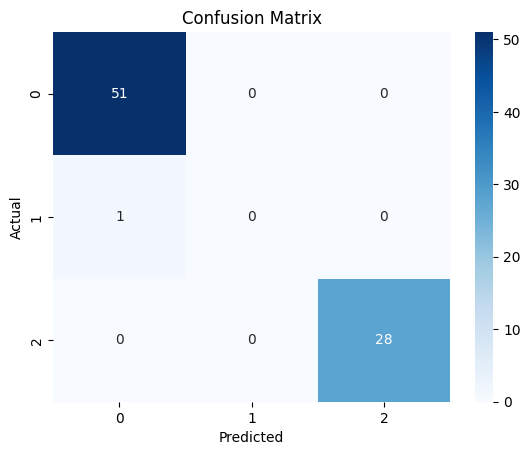

Accuracy: 0.9875


In [21]:
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


In [22]:
# Save model and scaler
# joblib.dump(model, 'random_forest_kidney_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, y, cv=5)
print("CV Accuracy:", scores)
print("Mean CV Accuracy:", scores.mean())

c:\users\abdul\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


CV Accuracy: [1.     1.     1.     0.9875 0.9875]
Mean CV Accuracy: 0.9949999999999999


In [24]:
import pickle

# Save the model in .sav format
filename = 'random_forest_kidney_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Save the scaler too, if needed
scaler_filename = 'scaler.sav'
pickle.dump(scaler, open(scaler_filename, 'wb'))